# Simple Comparative Tests

## Introduction


Simple comparative tests are those in which we consider experiments to compare two conditions (sometimes called treatments). These are often called *simple comparative experiments*. 

An example of these experiments is when we try to determine whether two different formulations of a product give equivalent results on a given property. For example, if you changed your antenna material for a new alloy and the final product is still giving you the same impedance.

We would need to run multiple samples of each formulation and then test if we do have equivalent results on a given output between those two formulations. In the example, if the old and the new allow give the same impedance.

Note that running multiple *measurements* on the same sample is a comparative experiment, but it would be testing if you have a comparable *measuring procedure* not if the different formulations are equivalent. The first step is always to determine what you are testing to get the correct population. 

In this case the population is N samples of each allow that will be then measured and compared.

The reason we need multiple samples is that it is impossible to have the exact same formulation or even measurement each time, so the test is allowing to tell if that difference is **significant** or not despite this existing variability. 

The test will be able to conclude there **is** a difference if this is significant. And the result of the test will be attached to a numeric value of **p that is the $\alpha$ or type-I error** that quantifies the probability that we are wrong in saying there is a difference.

If we cannot conclude there is a difference we will only be able to say **it is not significantly different**.

We will then need to evaluate how **powerful** our conclusion is, particularly if it is not significant. This power is attached to our $\beta$ **or type-II error** that quantifies the probability that we are wrong in saying there is no difference.

## CASE

We have built a bone phantom for a mouse femur that will be used for imaging experiments. 

For this phantom to be useful, it needs to show that the bone density that is measured is equivalent to animal bones when it is used in CT or X-Ray studies.

We will design an experiment to validate this equivalence: we build 10 samples using our phantom formulation and we will compare the measured density on a CT to that of 10 animal bone samples.

We will finally determine how **powerful** this conclusion is, and if needed, the number of samples that we would need to increase the power of this conclusion.

## Model

1. We have **2 input factors** (either the phantom formula, or the bone)
2. We measure as our **output factor** the density
3. We have some **controllable factors**: CT used for measurement, same operator, bones always from female mice 20 weeks old, boring tool used for the bones is the same, phantom formulation will not change, ...
4. We have some **uncontrollable factors**: room temperature when fabricating phantoms, animal activity levels may change, inaccuracy when boring the bone sample, ...

**Is the density measured equivalent between phantoms and animal samples?**

*When solving your assignment case, you will need to determine at least 3 possible controllable and uncontrollable factors that could affect your experiments*


## Randomization

The first step for this experiment is that the CT measurements should be done randomly. Why? 

*Let's imagine we measured phantoms in the morning and then bones in the afternoon...*

* If there were issues with the CT that affects the measuremetns over time, we could detect a difference that is caused by time, not by the sample
* If the operator is more accurate working in the morning, we could detect a difference caused by this fact and not the sample
* If the room temperature affects the phantoms more than the bones, we may miss this change

*When solving your assignment case, you will need to determine at least 3 possible scenarios that could affect your experiment if you did not randomize the measurements*

The simplest way to randomize this experiment could be to give a number to each experiment (1-10 for phantoms 11-20 for bones) and then generate a list of **NON REPEATED random numbers** between 1 and 20 and conduct in that order.

Or we could create a list of codes for each sample (20 in total) and randomize that list (example coded here).

In [1]:
# We need to import different packages that will allow to do math,
# lineal algebra, numerical operations,
# array operations and plotting

import scipy as Sci
import numpy as np
import random as rd  #this is the random package in Python

Code=['Phantom A','Phantom B','Phantom C','Phantom D','Phantom E','Phantom F','Phantom G','Phantom H',
      'Phantom I','Phantom J','Bone A','Bone B','Bone C','Bone D','Bone E','Bone F','Bone G','Bone H',
      'Bone I','Bone J']

rd.shuffle(Code)

print('Conduct the measurements in the following order:')
print(Code)   #every run of this code will give you a different result

Conduct the measurements in the following order:
['Phantom G', 'Phantom C', 'Bone I', 'Bone D', 'Bone A', 'Bone G', 'Bone J', 'Phantom F', 'Phantom J', 'Phantom D', 'Bone E', 'Phantom E', 'Phantom H', 'Phantom A', 'Bone C', 'Phantom I', 'Phantom B', 'Bone F', 'Bone B', 'Bone H']


We have measured the bone density in a series of bone samples following the order determined randomly before. The results are given in a table.

| Sample Number | Animal Bone ($y_{1j}$, $mg/mm^3$) | Phantom ($y_{2j}$, $mg/mm^3$)|
|---|--------|-------|
|1  |1616.86 |1617.50|
|2  |1616.40 |1617.63|
|3  |1617.21 |1618.25|
|4  |1616.35 |1618.00|
|5  |1616.53 |1617.86|
|6  |1617.04 |1617.75|
|7  |1616.96 |1618.22|
|8  |1617.15 |1617.90|
|9  |1616.59 |1617.96|
|10 |1616.57 |1618.15|

In [2]:
DensityBone=[1616.86 ,1616.40, 1617.21, 1616.35, 1616.53, 1617.04, 1616.96, 1617.15, 1616.59 ,1619.57]
DensityPhantom=[1617.50 ,1617.63 ,1618.25, 1618.00 ,1617.86, 1617.75, 1618.22, 1617.90, 1617.96, 1618.15]

## Visualizing your data

Before running a comparative test you always need to visualize your data to determine if there are any outliers you should take care of and have an idea of your spread.

You will also need to evaluate the validity of your test, a comparative test such as Student or T test will only be accurate on data that is normally distributed.

**Note** that you can always run a Student test on data that is not normal, that only means your results **cannot** be used, but the test will run and you will draw a conclusion that may not be valid.

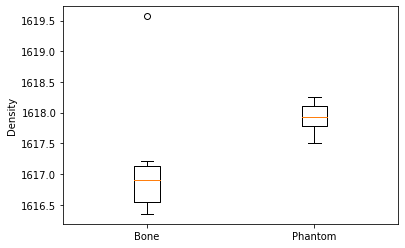

In [3]:
%matplotlib inline
# This is a magic command that initializes the matplotlib 
# library for plotting inline with this notebook

# We need to import plotting packages
import matplotlib.pyplot as plt

plt.boxplot([DensityBone,DensityPhantom])
plt.xticks([1, 2], ['Bone','Phantom'])
plt.ylabel('Density')
plt.show()

We note that we have an outlier on the bone samples. After inspection of such sample we realize that the sample was bored using the wrong tool and that may have affected the result, so a new sample is added to the pool and that one is eliminated. The new measurement was $1616.57 mg/mm^3$ and we modify our data.

### Activity 1 - Copy the code above to modify your outlier and obtain your new boxplot
### Activity 2 - Modify the vertical label to add the units with formatting

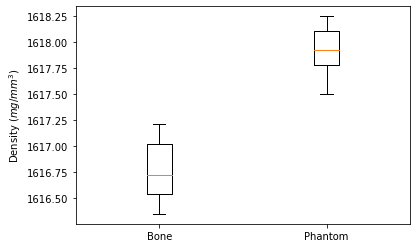

In [4]:
###################################################
# RESULT ##########################################
###################################################

DensityBone=[1616.86 ,1616.40, 1617.21, 1616.35, 1616.53, 1617.04, 1616.96, 1617.15, 1616.59 ,1616.57]
DensityPhantom=[1617.50 ,1617.63 ,1618.25, 1618.00 ,1617.86, 1617.75, 1618.22, 1617.90, 1617.96, 1618.15]

plt.boxplot([DensityBone,DensityPhantom])
plt.xticks([1, 2], ['Bone','Phantom'])
plt.ylabel('Density ($mg/mm^3$)')
plt.show()

## Checking for Normality

We need to make sure that our data is normally distributed or we won't be able to use a Student test. Remember, a test will always run but that does not mean it is the right test to use. 

To check for normality we use plot the probability plot of the sample data against the quantiles of a specified theoretical distribution, in our case, the **normal distribution**. 

A normal distribution is the typical bell-shaped "curve" where we have a high probability of something being at the *average* with larger and smaller values equally distributed in this bell shape towards lower and higher values. If we have any kind of skewed response (too many values high or too many low), it is no longer normal.

<img src="files/NormalDistribution.png" alt="NormalDistribution" width="600"/>

A normality plot generates the data plotted against a theoretical normal distribution in such a way that the points should form an approximate straight line if they are indeed normally distributed. 

<img src="files/NormalityTestNormal.png" alt="NormalityTestNormal" width="500"/>

Departures from this straight line indicate departures from normality. If the data is skewed, we observe many points at higher or lower values from the mean have an abnormally high or low probability and therefore the shape is no longer a bell.

<img src="files/NormalityTestSkewed.png" alt="NormalityTestSkewed" width="1200"/>

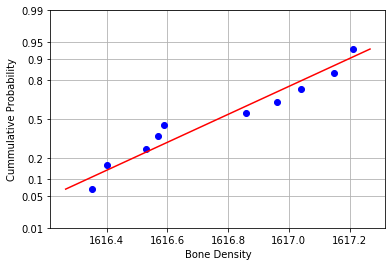

In [5]:
from scipy import stats
# Calculate quantiles and least-square-fit curve
(quantiles, values), (slope, intercept, r) = stats.probplot(DensityBone, dist='norm')
plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')
#define ticks in probability
ticks_perc=[0.01, 0.05, 0.10, 0.20, 0.50, 0.80, 0.90, 0.95, 0.99]
#transfrom them from precentile to cumulative density
ticks_quan=[stats.norm.ppf(i) for i in ticks_perc]
#assign new ticks
plt.yticks(ticks_quan,ticks_perc)
plt.xlabel('Bone Density')
plt.ylabel('Cummulative Probability')
plt.grid()
plt.show()

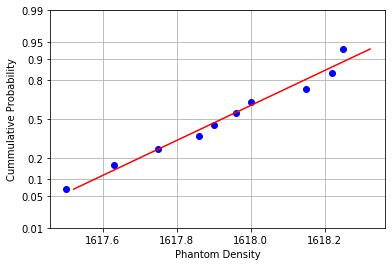

In [6]:
# Calculate quantiles and least-square-fit curve
(quantiles, values), (slope, intercept, r) = stats.probplot(DensityPhantom, dist='norm')
plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')
#define ticks in probability
ticks_perc=[0.01, 0.05, 0.10, 0.20, 0.50, 0.80, 0.90, 0.95, 0.99]
#transfrom them from precentile to cumulative density
ticks_quan=[stats.norm.ppf(i) for i in ticks_perc]
#assign new ticks
plt.yticks(ticks_quan,ticks_perc)
plt.xlabel('Phantom Density')
plt.ylabel('Cummulative Probability')
plt.grid()
plt.show()

We can run a test that will give us the significance value for a probability that the data is normal. The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. If the p<0.05 we reject the hypothesis and therefore the data is *likely not* normal.

If the value of p>0.05 then we *cannot reject* the hypothesis that the data is normal and we can then say that we are able to use tests that require a normal distribution of the data.

In [7]:
[ShapiroTestS, pShapiro] = stats.shapiro(DensityBone)
print(pShapiro)

[ShapiroTestS, pShapiro] = stats.shapiro(DensityPhantom)
print(pShapiro)

0.3418533504009247
0.8152429461479187


With the value of 0.34 for the bone and 0.82 for the phantom, we cannot reject the hypothesis that the data is normal and therefore we can continue using tests for normally distributed data.

**Both the normality plot and the Shapiro-Wilk test are telling us that the data is likely normal**

Therefore the mean and standard deviation can be used to represent our data.

In [8]:
print('The average density of the bone is: ',np.mean(DensityBone),u"\u00B1",np.std(DensityBone))
print('The average density of the phantom is: ',np.mean(DensityPhantom),u"\u00B1",np.std(DensityPhantom))

The average density of the bone is:  1616.766 ± 0.2997065231188927
The average density of the phantom is:  1617.922 ± 0.2351935373261785


## Hypothesis Testing

The averages are quite close and the question now is: **can we say that they are equivalent?** 

This means then that the phantom is indeed representing the bone.

By just using an "average $\pm$ std" approach we may decide that no, they are different, as the highest value for bone would be 1617 and the lowest for the phantom 1618, and they would seem "not to touch". But this is not a valid test, and we cannot quantify the certainty of this conclusion.

This is where the Student test or T Test comes in.

We test the hypothesis that the means of both populations are equal. If we reject that hypothesis then we know they are not the same population and therefore the alternative hypothesis $H_1$ that the means are not comparable (not equivalent) is valid.

$$H_0: \mu_1 = \mu_2$$
$$H_1: \mu_1 \neq \mu_2$$

**We will reject the null hypothesis $H_0$ if p<0.05**

This means that there is less than 5% chance that we made a mistake in rejecting the hypothesis and therefore we are quite certain that the samples are not equivalent.

In [9]:
# We run the ttest on the arrays; note we use ttest_ind because our samples are independent (non paired)
# A paired experiment is when we ran measurements on the same samples and we are testing if they gave a different response.
# For instance, if we had used two CTs to measure the same samples and were testing the equivalence of both CTs, that
# can be a paired experiment. As it is, we have two populations (bone and phantom) that are independent or non paired

[h,p]=stats.ttest_ind(DensityBone,DensityPhantom)

print('The p for the comparative test between bone and phantom samples is', p)

The p for the comparative test between bone and phantom samples is 3.7165577586381604e-08


We can clearly see with a p<<0.001 that this is significant and therefore we **reject** the hypothesis that the phantom and the bone have the same density.

The alternative hypothesis is then accepted

$$H_1: \mu_{phantom} \neq \mu_{bone}$$

**Our phantom cannot be used to mimic the bone**

The p gives us a value of the probability that we made a mistake in this rejection. We are quite certain that we did not because the p is very low.

## Statistical Power

We can also answer other questions with comparative tests:
1. How sure am I that if I was correct in **not** rejecting the null hypothesis? This would be particularly important if the difference was not significant.
2. How many samples would I have needed if I wanted to detect a specific difference (let's say, a change of 10% in density)? This would be particularly useful when planning further experiments.

These questions are related to the **statistical power** of the test.

It evaluates the likelihood of a type-II error (1-$\beta$) where $\beta$ is the power.

For power calculations we will need to calculate the **effect size**, which is defined as

$$d=\frac{\mu_1-\mu_2}{s}$$

$$s=\sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}}$$

d is the effect size, s is the pooled variance of the samples obtained from the $s_1$ and $s_2$ variances of each sample group.

In [10]:
# Let's answer question 1: what is the power of my test? This is not really necessary as we know the samples are different
# but it will give an idea of how to do this calculation

# Estimate power
from statsmodels.stats.power import TTestPower

nobs1 = 10  #we have 10 samples
alpha = 0.05  #we are testing for a 5% alpha (p<0.05)

# The most typical calculation of the effect is given by the difference of the means normalized by a pooled std deviation

# The pooled std deviation is obtained by:
n1=n2=nobs1

s = np.sqrt(( (n1-1) * np.std(DensityBone)**2 + (n2-1) * np.std(DensityPhantom)**2) / (n1 + n2 - 2))
effect = (np.mean(DensityBone) - np.mean(DensityPhantom)) / s

# perform power analysis
analysis = TTestPower()
result = analysis.power(effect_size=effect, nobs=nobs1, alpha=alpha, df=None)
print('Power of the Test Beta is : ', result)

Power of the Test Beta is :  1.0


Telling us that the power of this test was 99.99999...%
If we had not found a difference there is a 0.000000... 1 % chance that we are mistaken.

In [11]:
# Let's answer question 2: what is the sample size that I need to detect a similar difference in means with the pooled 
# standard deviation that we have observed from previous experiments but a power of 90%?

# Estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower

s = np.sqrt(( (n1-1) * np.std(DensityBone)**2 + (n2-1) * np.std(DensityPhantom)**2) / (n1 + n2 - 2))
effect = abs((np.mean(DensityBone) - np.mean(DensityPhantom)) / s)

alpha = 0.05
power = 0.90
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect_size=effect, nobs1=None, alpha=alpha, power=power, ratio=1.0)
print('Sample Size: %.3f' % result)
print('Effect Size: %.3f' % effect)

Sample Size: 2.581
Effect Size: 4.291


In this case the function gives a result of less than 10 samples. The T test will always need at least a suggested 10 samples so we should run the experiment with 10 samples!

## Activity 3: run the calculations for higher power and lower type-I error to determine if you would need more samples if you wanted to be more stringent

## Activity 4: evaluate the difference in means that you could detect assuming the variance is kept for an 80% power and 5% type-I error

In [12]:
###################################################
# RESULT ##########################################
###################################################

# Estimate sample size via power analysis


Sample Size: 2.306
Effect Size: 4.291


In [13]:
###################################################
# RESULT ##########################################
###################################################

# Estimate effect size via power analysis


Effect Size: 1.325
Difference in Means we will consider as significant: 0.099


## Comparing to a Specific Value

We can also use comparative tests if we were trying to determine if the average value obtained is equal to a specified value. This is useful for example when we need to prove that our samples have the value in a specification sheet.

We now test for the hypothesis that the mean is equal to a value

$$H_0: \mu_1 = value$$
$$H_1: \mu_1 \neq value$$

**We will reject the null hypothesis $H_0$ if p<0.05**

This means that there is less than 5% chance that we made a mistake in rejecting the hypothesis. 

If we reject with a low p we are quite certain that the samples have a value that is not equal to the specification.

If we don't reject then we can assert the samples meet the specification.

Such hypothesis is tested using a **Z-test**. The model is similar to a T-test but using a value, which allows also to test for lower than or larger than such value.

We will first test for equivalence to a value. We use a **two sided Z-test** which means we are testing if the mean is within the centre of the distribution and *not* on the right or left tails of it.

In [14]:
# Can we affirm that the average density of our phantom is equal to 1620?
from statsmodels.stats.weightstats import ztest

# The Z test can be run with just one sample set for the phantom and tested against the value of 1620
# The variance being pooled is only used if two set of samples is used to indicate they have similar 
# variances. If two sample sets are used the difference between them is tested agains the value.
# In our case, we don't want this so the second set is None
# When comparing means the degrees of freedom should be 1.0

[t, p] = ztest(DensityPhantom, x2=None, value=1620, alternative='two-sided', usevar='pooled', ddof=1.0)
print(p)

8.302807456646073e-155


With a p<<0.001 we reject this hypothesis so we **do not** have an average density of $1620 mg/mm^3$

This means that there is a very low probability we made a mistake in this rejection. The samples *do not* have a value that is equal to the specification value.

But what if our specification said that the density should be $\leq 1620 mg/mm^3$? We are now testing for a hypothesis that we are lower or equal to a value:


$$H_0: \mu_1 = value$$
$$H_1: \mu_1 > value$$

**We will reject the null hypothesis $H_0$ if p<0.05**

**If we reject the null hypothesis the alternate $H_1$ is then accepted**

This means that if we reject the hypothesis there is less than 5% chance that we made a mistake and therefore we are quite certain that the samples have a value that is larger than the specification value. We accept the **alternative** hypothesis $H_1: \mu_1 > value$.

Note that the Z test used in python has as a parameter the **alternative** hypothesis, so for this case the parameter should be **larger** since $H_1: \mu_1 > value$.

In [15]:
# Can we affirm that the average density of our phantom is lower or equal to 1620?
from statsmodels.stats.weightstats import ztest

[t, p] = ztest(DensityPhantom, x2=None, value=1620, alternative='larger', usevar='pooled', ddof=1.0)
print(p)

1.0


With a p=1 we cannot reject this hypothesis so it is very likely that indeed the average density is smaller or equal than $1620 mg/mm^3$.

Note that for some packages and other languages the Z-test may use the terminology of **right tail** to test the **alternative** hypothesis that the sample has a mean found at a value on the *right of the tail, which means it is > value*.

We **cannot** reject the null hypothesis and therefore it is likely that the average density is $\leq 1620 mg/mm^3$.

This means that there is a very low chance that we made a mistake and therefore we are quite certain that the samples *do* have a density value that is lower or equal than the specification value.

Finally, if our specification said that the density should be $\geq 1620 mg/mm^3$? We are now testing for a hypothesis that we are greater or equal than a value:

$$H_0: \mu_1 = value$$
$$H_1: \mu_1 < value$$

**We will reject the null hypothesis $H_0$ if p<0.05**

**If we reject the null hypothesis the alternate $H_1$ is then accepted**

This means that if we reject the hypothesis there is less than 5% chance that we made a mistake and therefore we are quite certain that the samples have a value that is lower than the specification value.

If we don't reject then we can assert the samples meet the specification to be greater than that value.

Again the Z test used in python has as a parameter the **alternative** hypothesis, so for this case the parameter should be **smaller** since $H_1: \mu_1 < value$.

In [16]:
from statsmodels.stats.weightstats import ztest

[t, p] = ztest(DensityPhantom, x2=None, value=1620, alternative='smaller', usevar='pooled', ddof=1.0)
print(p)

4.151403728323036e-155


As expected with such a p<<0.001 indicates that the null hypothesis is rejected and the alternative is accepted. Therefore it is very likely that indeed the average density is smaller than $1620 mg/mm^3$. This was indeed expected from the two previous results.

Note that for some packages and other languages the Z-test may use the terminology of **left tail** to test the **alternative** hypothesis that the sample has a mean found at a value on the *left of the tail, which means it is < value*.

### Misuse of tails in tests

One of the most common misunderstandings when using tails in comparative tests is entering the value of the tail to obtain the p that is expected. For instance, thinking it is testing for equivalence and instead of entering two-tails changing to right and then left until we get the rejection "we expect".

It is clear that this parameter has a very specific meaning as it will test very different hypotheses. This is less unclear in the statistic functions used here in Python but be clear on the concept when using R, SPCC or Matlab statistic packages.

# Paired Observations

Another common misunderstanding is the use of paired vs unpaired samples. Many experimenters try either parameter and use the one that gives a more significant result. 

This is a mistake as this choice depends on how the experiment was run.

---

**Paired Samples**

If a test run is on the same subjects under different conditions these are paired observations and you can use this parameter on your comparative tests, otherwise you should use unpaired samples as a parameter. 

When using a paired sample experiment our population is quite 'uniform' as it is the same but subjected to different conditions, which then allows us to be more stringent in the test and it will be easier to reject the null hypothesis.

But this can only be used if we are **indeed** on a paired sample experiment.

Some packages use the term **independent samples** for unpaired and **related samples** for paired.

---

Let's now analyse a case where we would perform paired observations. 

We finished our experiments but one of the operators is proposing to make the density measurements using an old CT that has not been qualibrated to save costs. 

We have some doubts if a change of CT will affect the results so to make sure we will compare mesurements with this CT to a fully calibrated CT. 

We can conduct this experiment on the same set of samples on both CTs. We will then compare the measures given by both CTs and expect to have no difference.

Under these conditions, our population of samples is the same and we have **paired observations** or **related samples**.

Because we are making measurements on the SAME samples with the TWO factors this paired comparison will increase our sensitivity to rejection of the null hypothesis. 

In other words, we will be able to tell is a small difference is really significant with less samples.

Just as before we will start to enter our data and plot it for outliers, followed by normality tests. Otherwise, a T test cannot be run.

| Sample Number | Denstity from $CT_1$ ($y_{1j}$, $mg/mm^3$) | Density from $CT_2$ ($y_{2j}$, $mg/mm^3$)|
|---|--------|---------|
|1  |1617.50 | 1617.18 | 
|2  |1617.63 | 1617.78 | 
|3  |1618.25 | 1618.11 | 
|4  |1618.00 | 1617.33 | 
|5  |1617.86 | 1617.56 | 
|6  |1617.75 | 1617.95 | 
|7  |1618.22 | 1617.51 | 
|8  |1617.90 | 1617.55 | 
|9  |1617.96 | 1617.99 | 
|10 |1618.15 | 1617.95 | 



## Activity 4: repeat the code from the examples above to enter and plot your data and test for normality


In [24]:
###################################################
# RESULT ##########################################
###################################################

DensityDetector1=[1617.50, 1617.63, 1618.25, 1618.00, 1617.86, 1617.75, 1618.22, 1617.90, 1617.96, 1618.15]
DensityDetector2=[1617.18, 1617.78, 1618.11, 1617.33, 1617.56, 1617.95, 1617.51, 1617.55, 1617.99, 1617.95]

In [25]:
###################################################
# RESULT ##########################################
###################################################



In [26]:
###################################################
# RESULT ##########################################
###################################################



In [27]:
###################################################
# RESULT ##########################################
###################################################



Assuming that your activity shows that your data is **normally distributed** we can now test for equivalence between those measurements using a T test, but ensuring we enter a parameter for **paired observations**.

As before we are using the hypotheses:

$$H_0: \mu_1 = \mu_2$$
$$H_1: \mu_1 \neq \mu_2$$

**We will reject the null hypothesis $H_0$ if p<0.05**

In [28]:
# We run the ttest on the arrays; note we use ttest_rel because our samples are related (paired)

[h,p]=stats.ttest_rel(DensityDetector1,DensityDetector2)

print('The p for the comparative test between CTs is', p)

The p for the comparative test between CTs is 0.04212638022565464


We **reject** the null hypothesis and therefore we expect that both CTs are **not** giving a similar result. The recommendation would be that the CT that is not calibrated should not be used.

If we had run a T test without considering paired observations the result would be:

In [29]:
# We run the ttest on the arrays; note we use ttest_rel because our samples are related (paired)

[h,p]=stats.ttest_ind(DensityDetector1,DensityDetector2)

print('The p for the comparative test with unpaired observations between CTs is', p)

The p for the comparative test with unpaired observations between CTs is 0.08261094730277084


We would **not reject** the null hypothesis and therefore we would have concluded that both CTs were giving a similar result. The recommendation would be the **complete opposite and this would be a mistake**.

This is a common manipulation in experimental analysis, if the experimenter was hoping to prove the old CT could be used, unpairing the observations in the analysis gives her/him this answer, but it is not a valid answer as the observations are paired and the CTs are not equivalent!

We can just finally calculate the power of this test to complete the analysis.

## Activity 5: obtain the power of the test used for the comparison of CTs

In [30]:
###################################################
# RESULT ##########################################
###################################################



The activity is left to you, but try to think about the result: does this power mean you are quite certain of your conclusion? Would it matter if you made a mistake about paired vs unpaired observations? Can the power "save" you from a wrong conclusion? Why or why  not?

## Summary

In this example:

1. We introduced boxplot and normality plots and tests to ensure applicability of comparative tests 
2. We introduced the concept of comparative tests on normal populations
3. We analysed the concept of statistical power and sample size
4. We performed comparisons with specific values commonly used to prove adherence to specifications
5. We introduced comparisons when using paired samples

References
---------------

* Montgomery, Douglas C. "Design and analysis of experiments. John Wiley & Sons." Inc., New York 1997 (2001).